In [142]:
#Scikitlearn libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn import neighbors 
from sklearn.model_selection import cross_val_score 
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import numpy as np 
import pandas as pd 
import seaborn as sns

from scipy import stats

import xgboost as xgb

from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import hist, show, xticks,yticks
from matplotlib import pyplot
import matplotlib.ticker as ticker


## DATA EXPLORATION

#### Retrieve Train data into dataframe

In [143]:
df_train = pd.read_csv('C:/Users/ajayc/Desktop/ACN/2_Spring2018/ML/Project/WSDM/DATA/train.csv', dtype={'is_churn' : np.int8})

In [144]:
df_train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


#### Reading Test and members data

In [145]:
df_test = pd.read_csv("C:/Users/ajayc/Desktop/ACN/2_Spring2018/ML/Project/WSDM/DATA/sample_submission_v2.csv")

In [146]:
df_members = pd.read_csv('C:/Users/ajayc/Desktop/ACN/2_Spring2018/ML/Project/WSDM/DATA/members_v3.csv', parse_dates=['registration_init_time'], dtype={'city': np.int8, 'bd': np.int16, 'registered_via': np.int8})

In [147]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


#### Merging the two train csv files into one

In [148]:
#Merging the second train file with train dataframe in the dictionary
df_train = pd.concat((df_train, pd.read_csv('C:/Users/ajayc/Desktop/ACN/2_Spring2018/ML/Project/WSDM/DATA/train_v2.csv',dtype={'is_churn' : np.int8} )), axis=0, ignore_index=True).reset_index(drop=True)

In [149]:
df_train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


#### Uploading and merging the two transaction files

In [150]:
df_transactions = pd.read_csv('C:/Users/ajayc/Desktop/ACN/2_Spring2018/ML/Project/WSDM/DATA/transactions.csv', parse_dates=['transaction_date','membership_expire_date'], dtype={'payment_method_id': np.int8, 'payment_plan_days': np.int16, 'plan_list_price': np.int16, 'actual_amount_paid': np.int16, 'is_auto_renew': np.int8, 'is_cancel': np.int8})
df_transactions= pd.concat((df_transactions, pd.read_csv('C:/Users/ajayc/Desktop/ACN/2_Spring2018/ML/Project/WSDM/DATA/transactions_v2.csv', parse_dates=['transaction_date','membership_expire_date'], dtype={'payment_method_id': np.int8, 'payment_plan_days': np.int16, 'plan_list_price': np.int16, 'actual_amount_paid': np.int16, 'is_auto_renew': np.int8, 'is_cancel': np.int8} )), axis=0, ignore_index=True).reset_index(drop=True)

In [151]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0


### Exploratory Data Analysis

#### We plot and check the number of users churned, giving us an idea that most of the users churn

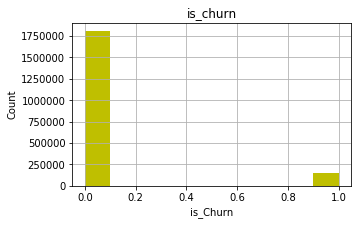

In [152]:
df_train.hist(figsize=(5,3),color = 'y')
plt.xlabel('is_Churn')
plt.ylabel('Count')
plt.show()

Majority of the users churn, so here we have less data of the users who do not churn

#### Gender based distribution of users churning

In [153]:
gender = list(df_members['gender'])
gender_null=['not given' if x is np.nan else x for x in gender]
gender_counts = Counter(gender_null)


In [154]:
gender_counts

Counter({'female': 1144613, 'male': 1195355, 'not given': 4429505})

Text(0,0.5,'count')

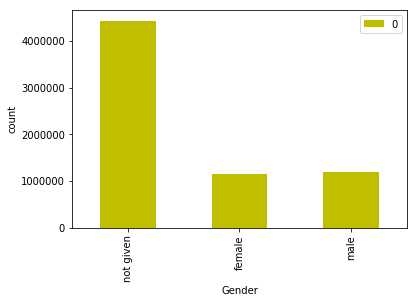

In [156]:
#Now we try to visulaize the distribution of churning users based on gender
df = pd.DataFrame.from_dict(gender_counts, orient='index')
df.plot(kind='bar',color = 'y')
pyplot.xlabel('Gender')  
pyplot.ylabel('count') 

Ratio among the gender specifying users is similar

### Next, Members features are explored

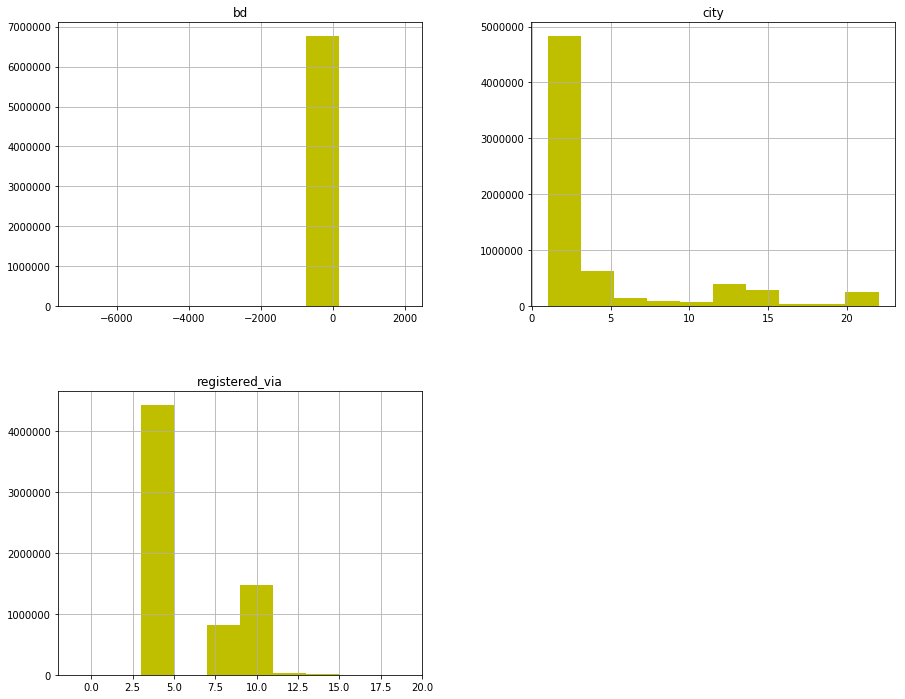

In [157]:
df_members.hist(figsize=(15,12),color = 'y')
plt.show()

City '1' has maximum number of users, 
Registered via 4 method is more popular

bd shows negative as we need to do some pre processing on that feature

### Now, Transaction features are explored

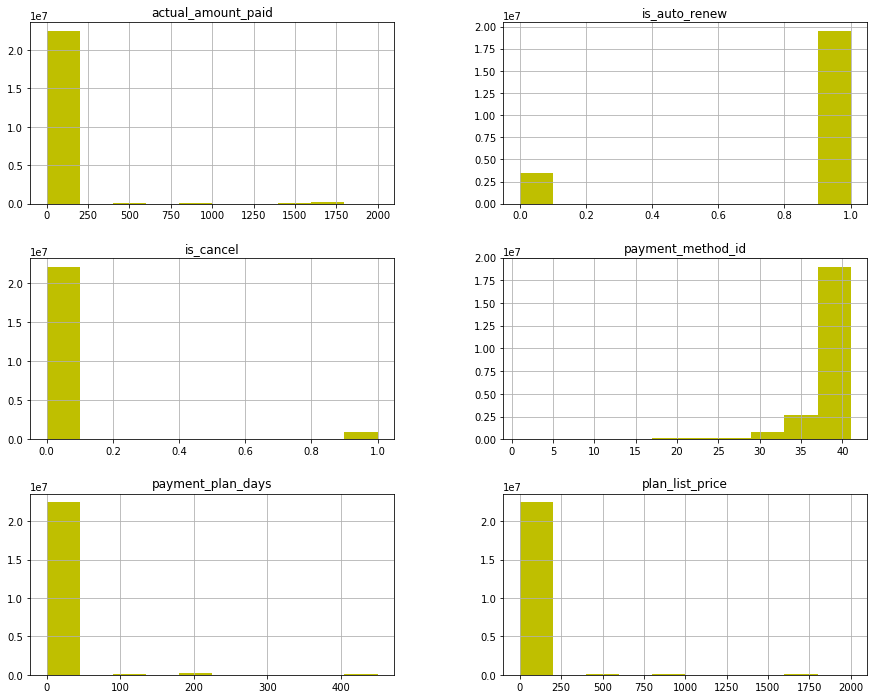

In [158]:
df_transactions.hist(figsize=(15,12),color = 'y')
plt.show()

#### Findings
Payment Method 41 is the most popular, 
Majority users have not cancelled the services also ,
Auto renew option is on for majority of users

In [159]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


In [160]:
df_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int8
bd                        int16
gender                    object
registered_via            int8
registration_init_time    datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int8(2), object(2)
memory usage: 180.8+ MB


### Data Cleaning

Removing the not possible values from age column

In [161]:
df_members['bd'] = df_members['bd'].clip_upper(100).clip_lower(10)

In [162]:
gender = {'male':1, 'female':2}

In [163]:
df_members['gender'] = df_members['gender'].map(gender) # making category column to int

In [164]:
df_members['gender'] = df_members['gender'].fillna(0) #Filling the null values in the column

In [165]:
#Checking for the null count
df_members.isnull().sum()  

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64

#### For Memory saving, we change the data types of features based in their values range

In [166]:
##Portion to change datatypes
def change_int_datatype_cols(df):
    integer_cols = list(df.select_dtypes(include=['int']).columns)
    for col in integer_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)



def change_float_datatype_cols(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        df[col] = df[col].astype(np.float32)

In [167]:
change_int_datatype_cols(df_members)

In [168]:
change_float_datatype_cols(df_members)

Binning -We add a categorical version of the bd column, divide the numerical variable into children, teenagers, middle and old. 

In [169]:
age_bins = [0, 18, 30, 50,100]

In [170]:
age_groups = ['children', 'adults', 'medium','old']

In [171]:
#New Col added
df_members['bd_c'] = pd.cut( df_members['bd'] , age_bins, labels=age_groups)

Converting the categorical into numerical format (0,1,2,3)

In [172]:
le = preprocessing.LabelEncoder()

In [173]:
le.fit(df_members['bd_c'])

LabelEncoder()

In [174]:
df_members['bd_c'] = le.transform(df_members['bd_c'])

In [175]:

df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,bd_c
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,10,0.0,11,2011-09-11,1
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,10,0.0,7,2011-09-14,1
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,10,0.0,11,2011-09-15,1
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,10,0.0,11,2011-09-15,1
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,2.0,9,2011-09-15,2


In [176]:
#Removing one negative value in registred via
df_members = df_members[df_members.registered_via != -1]

In [177]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22978755 entries, 0 to 22978754
Data columns (total 9 columns):
msno                      object
payment_method_id         int8
payment_plan_days         int16
plan_list_price           int16
actual_amount_paid        int16
is_auto_renew             int8
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 int8
dtypes: datetime64[ns](2), int16(3), int8(3), object(1)
memory usage: 723.2+ MB


### Feature Engineering

First we plan to check if users had been given any discounts

Discount

In [178]:
df_transactions['discount'] = df_transactions['plan_list_price'] - df_transactions['actual_amount_paid']

In [179]:
df_transactions['discount'].unique()

array([    0,   149,  -149,    30,  -119,  -150,  -129,  -536,  -894,
       -1788,  -134,    20,  -799,   120,   180,   -35,    50, -1599,
        -100,  -131,  -300,  -480,  -450,    -1, -1000,  -105,     1,
        -447, -1200,  -930,   -30,   -50,   699,   -11,  -350,  -500,
           4,  -400,   -41,   -14, -2000,   -95,   -20,  -596,    45,
       -1150,   108,  -760,   -12,    99,   129,  1599,    10,     8,
         -90,    -3,   894], dtype=int64)

So we convert the negatives and positives to 0 and 1, for better visualization

In [180]:
df_transactions['is_discount'] = df_transactions.discount.apply(lambda x: 1 if x > 0 else 0)

#### Next we check for the amount paid by users per day

Cost Per Day

In [181]:
df_transactions['amount_per_day'] = df_transactions['actual_amount_paid']/df_transactions['payment_plan_days']

In [182]:
df_transactions['amount_per_day'].unique()

array([4.30000000e+00, 4.96666667e+00, 0.00000000e+00,            inf,
       3.30000000e+00, 3.96666667e+00, 4.80645161e+00, 3.33333333e+00,
       5.00000000e+00, 4.36097561e+00, 6.00000000e+00, 4.58461538e+00,
       4.00000000e+00, 4.04810127e+00, 2.97777778e+00, 4.43888889e+00,
       4.80000000e+00, 3.97500000e+00, 3.99750000e+00, 3.31111111e+00,
                  nan, 4.65000000e+00, 4.25714286e+00, 3.88333333e+00,
       3.72500000e+00, 4.46666667e+00, 5.30000000e+00, 3.97333333e+00,
       4.13333333e+00, 4.06363636e+00, 3.33333333e-02, 4.36666667e+00,
       4.89863014e+00, 4.51515152e+00, 1.11111111e-02, 4.23333333e+00,
       4.16438356e+00, 4.41666667e+00, 4.76666667e+00, 4.44444444e+00,
       1.00000000e+00, 7.00000000e+00, 4.22222222e+00, 4.38780488e+00,
       4.56410256e+00, 1.66666667e+01, 4.39512195e+00, 4.20705882e+00,
       3.85301205e+00, 4.47000000e+00, 4.73684211e-01, 4.35384615e+00,
       1.36666667e+00, 4.39024390e+00, 3.55890411e+00, 3.83287671e+00,
      

There are some infinite values present in the amount per day, we need to fill those up with zeroes

In [183]:
df_transactions['amount_per_day'] = df_transactions['amount_per_day'].replace([np.inf, -np.inf], 0)

In [184]:
df_transactions['amount_per_day'] = df_transactions['amount_per_day'].fillna(0)

#### We check and add column for the membership duration

Membership Duration

In [185]:
df_transactions['membership_duration'] = df_transactions['membership_expire_date'] - df_transactions['transaction_date']

In [186]:
df_transactions['membership_duration']  = df_transactions['membership_duration']  / np.timedelta64(1, 'D')

In [187]:
df_transactions['membership_duration'] = df_transactions['membership_duration'].astype(int)

In [188]:
df_transactions['membership_duration'] = df_transactions['membership_duration'].clip_lower(0)

Auto Renew

In [189]:
#We check a column to see the auto renewal status of users license
df_transactions['not_auto_renew'] = df_transactions.is_auto_renew.apply(lambda x: 1 if x == 0 else 0)

In [190]:
#We have derived important features and now we will dropped the columns to reduce memory usage
drop_columns = ['discount' , 'plan_list_price', 'actual_amount_paid', 'transaction_date','is_auto_renew' ]
df_transactions = df_transactions.drop(drop_columns, 1)

Changing the data types of transaction dataframe for memory reduction

In [191]:
##Memory Reduction
change_int_datatype_cols(df_transactions)
change_float_datatype_cols(df_transactions)

Final DF after preprocessing

In [192]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,membership_expire_date,is_cancel,is_discount,amount_per_day,membership_duration,not_auto_renew
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,2015-11-01,0,0,4.300000,32,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,2015-10-31,0,0,4.966667,31,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,2016-04-27,0,0,4.300000,210,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,2015-11-28,0,0,4.966667,59,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,2015-11-21,0,0,4.966667,52,0


New Features after preprocessing: is_cancel, is_discount, amount_per_day, not_auto_renew

#### Some users have multiple records, so now we group those records

Defining a mode function to be applied to categorical columns

In [193]:
mode_fn = (lambda x: stats.mode(x)[0][0])

Defining a mean function to be applied to continuous columns

In [194]:
mean_fn = (lambda x: np.mean(x))

In [195]:

f = {'payment_method_id': {'payment_method_id': mode_fn },
     'payment_plan_days': {'payment_plan_days': mean_fn}, 
     'not_auto_renew':['sum'],
     'msno':['size'],
     'is_cancel':['sum'],
     'is_discount':['sum'],
     'amount_per_day':{'amount_per_day': mean_fn},
     'membership_duration':{'membership_duration': mean_fn},
     'membership_expire_date':['max']}

Applying mean and mode on various columns

In [196]:
df_group_by = df_transactions.groupby('msno').agg(f)

C:\Users\ajayc\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [197]:
#Grouped by data in a dataframe groupby
df_group_by = df_group_by.reset_index()



In [198]:
df_group_by.head()

,msno,payment_method_id,payment_plan_days,not_auto_renew,msno,is_cancel,is_discount,amount_per_day,membership_duration,membership_expire_date
,,payment_method_id,payment_plan_days,sum,size,sum,sum,amount_per_day,membership_duration,max
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7.000000,1,1,0,0,0.000000,5.000000,2016-09-14
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,402.500000,2,2,0,0,4.204538,440.500000,2018-02-06
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30.000000,0,5,0,0,3.300000,30.000000,2017-04-15
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,28.714286,0,21,0,0,4.707271,49.095238,2017-05-19
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,28.888889,0,27,0,0,4.782716,30.407407,2017-04-26


In [199]:
df_group_by.columns = df_group_by.columns.droplevel(1)

In [200]:
df_group_by.columns = ['msno','payment_method_id','payment_plan_days','not_auto_renew','msno_count','is_cancel','is_discount','amount_per_day','membership_duration','membership_expire_date']

Updated the columns of the new dataframe

Now we will merge the members and groupby dataframe  

In [201]:
df_group_by = pd.merge(df_group_by,df_members, on = 'msno', how = 'left')

In [202]:
#We see some null values in the gender, city bd registerd_via column, we replace those either with mean(numeric) or mode(categorical)
df_group_by.head(20)

,msno,payment_method_id,payment_plan_days,not_auto_renew,msno_count,is_cancel,is_discount,amount_per_day,membership_duration,membership_expire_date,city,bd,gender,registered_via,registration_init_time,bd_c
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7.000000,1,1,0,0,0.000000,5.000000,2016-09-14,15.0,28.0,2.0,9.0,2004-03-27,0.0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,402.500000,2,2,0,0,4.204538,440.500000,2018-02-06,6.0,22.0,2.0,3.0,2012-12-24,0.0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30.000000,0,5,0,0,3.300000,30.000000,2017-04-15,1.0,10.0,0.0,7.0,2014-06-08,1.0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,28.714286,0,21,0,0,4.707271,49.095238,2017-05-19,15.0,26.0,1.0,9.0,2010-11-18,0.0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,28.888889,0,27,0,0,4.782716,30.407407,2017-04-26,1.0,10.0,0.0,7.0,2014-09-27,1.0
5,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,41,30.000000,0,13,0,0,4.966667,30.461538,2017-04-15,18.0,21.0,1.0,7.0,2016-03-15,0.0
6,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,40,45.444444,1,9,1,0,4.301158,50.444444,2016-03-01,15.0,32.0,1.0,3.0,2012-12-17,2.0
7,++/TR7WI15q2ZCtOXmoap7jR+kEhbMVE5swOqsfqpqI=,11,27.000000,0,9,1,0,4.361410,30.555556,2015-09-25,NaN,NaN,NaN,NaN,NaT,NaN
8,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,39,28.714286,0,21,0,0,4.707271,53.095238,2017-05-23,22.0,32.0,1.0,9.0,2012-01-22,2.0
9,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,22.173913,0,23,0,0,3.671015,33.391304,2017-05-04,13.0,39.0,1.0,3.0,2014-04-21,2.0


In [203]:
df_group_by['gender'] = df_group_by['gender'].fillna(0)  #Filled na with zero
df_group_by['city'].fillna(df_group_by['city'].mode()[0], inplace=True)  #Filled na with mode
df_group_by['bd_c'].fillna(df_group_by['bd_c'].mode()[0], inplace=True) #Filled na with mode
df_group_by['bd'].fillna((df_group_by['bd'].mean()), inplace=True)   #Filled na with mean
df_group_by['registered_via'].fillna(df_group_by['registered_via'].mode()[0], inplace=True)  #Filled na with mode

To calculate the duration of how long the user has been with the KKBox, 
we take expiration date from transaction and registration_init_time

In [204]:
df_group_by['reg_mem_duration'] = df_group_by['membership_expire_date'] - df_group_by['registration_init_time']
df_group_by['reg_mem_duration']  = df_group_by['reg_mem_duration']  / np.timedelta64(1, 'D')
df_group_by['reg_mem_duration'] = df_group_by['reg_mem_duration'].clip_lower(0)
df_group_by['reg_mem_duration'].fillna((df_group_by['reg_mem_duration'].mean()), inplace=True)
df_group_by['reg_mem_duration'] = df_group_by['reg_mem_duration'].astype(int)
df_group_by['long_time_user'] = (df_group_by['reg_mem_duration']/365).astype(int)

In [205]:
df_group_by.head()

,msno,payment_method_id,payment_plan_days,not_auto_renew,msno_count,is_cancel,is_discount,amount_per_day,membership_duration,membership_expire_date,city,bd,gender,registered_via,registration_init_time,bd_c,reg_mem_duration,long_time_user
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7.000000,1,1,0,0,0.000000,5.000000,2016-09-14,15.0,28.0,2.0,9.0,2004-03-27,0.0,4554,12
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,402.500000,2,2,0,0,4.204538,440.500000,2018-02-06,6.0,22.0,2.0,3.0,2012-12-24,0.0,1870,5
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30.000000,0,5,0,0,3.300000,30.000000,2017-04-15,1.0,10.0,0.0,7.0,2014-06-08,1.0,1042,2
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,28.714286,0,21,0,0,4.707271,49.095238,2017-05-19,15.0,26.0,1.0,9.0,2010-11-18,0.0,2374,6
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,28.888889,0,27,0,0,4.782716,30.407407,2017-04-26,1.0,10.0,0.0,7.0,2014-09-27,1.0,942,2


In [206]:
drop_columns = ['membership_expire_date' , 'registration_init_time', 'reg_mem_duration'] # to reduce memory usage
df_group_by = df_group_by.drop(drop_columns, 1)

We use min max scaler (range of which is 0 to 1), also retaining the actual columns in a separate dataframe

In [207]:
mms = MinMaxScaler()
import copy
columns_to_scale =['payment_plan_days','not_auto_renew','msno_count','is_cancel','is_discount','amount_per_day','membership_duration','long_time_user','bd']

In [208]:
df_group_by2 = copy.copy(df_group_by)

In [209]:
df_group_by2[columns_to_scale] = mms.fit_transform(df_group_by2[columns_to_scale])

We do Label encoding for the categorical features, which results in many columns

In [210]:
categorical_features = ['payment_method_id','city','registered_via']

In [211]:
df_group_by2[categorical_features] = df_group_by2[categorical_features].apply(preprocessing.LabelEncoder().fit_transform)

In [212]:
df_group_by2.head()

,msno,payment_method_id,payment_plan_days,not_auto_renew,msno_count,is_cancel,is_discount,amount_per_day,membership_duration,city,bd,gender,registered_via,bd_c,long_time_user
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,33,0.015556,0.004098,0.000000,0.0,0.0,0.000000,0.001382,13,0.200000,2.0,3,0.0,0.545455
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,20,0.894444,0.008197,0.004115,0.0,0.0,0.554580,0.121752,4,0.133333,2.0,0,0.0,0.227273
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,39,0.066667,0.000000,0.016461,0.0,0.0,0.435271,0.008292,0,0.000000,0.0,2,1.0,0.090909
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,37,0.063810,0.000000,0.082305,0.0,0.0,0.620891,0.013570,13,0.177778,1.0,3,0.0,0.272727
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,39,0.064198,0.000000,0.106996,0.0,0.0,0.630842,0.008404,0,0.000000,0.0,2,1.0,0.090909


Now we merge this groupby2 with test and training data

In [213]:
df_train = pd.merge( df_train , df_group_by2 , on = 'msno' , how = 'inner' )
df_test = pd.merge( df_test , df_group_by2 , on = 'msno' , how = 'inner' )

Again we change the data type to reduce memory usage

In [214]:
change_int_datatype_cols(df_test )
change_float_datatype_cols(df_test )
change_int_datatype_cols(df_train)
change_float_datatype_cols(df_train)

#### Now we plot the correlation heat map between these features of train 

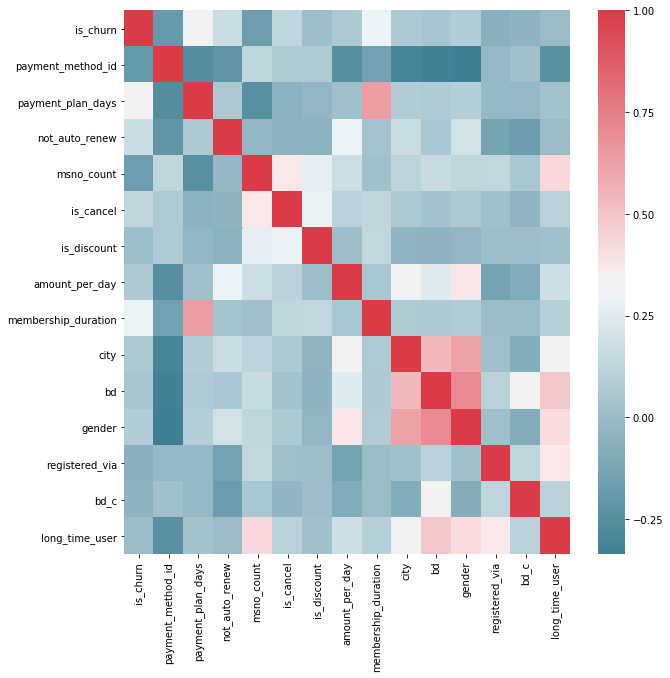

In [215]:
f, ax = plt.subplots(figsize=(10, 10))
correlation_df = df_train.corr()
sns.heatmap(correlation_df, mask=np.zeros_like(correlation_df, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [216]:
df_train.corr()

,is_churn,payment_method_id,payment_plan_days,not_auto_renew,msno_count,is_cancel,is_discount,amount_per_day,membership_duration,city,bd,gender,registered_via,bd_c,long_time_user
is_churn,1.000000,-0.187940,0.314129,0.172896,-0.163991,0.134477,0.008634,0.070561,0.295386,0.069257,0.048589,0.088017,-0.065922,-0.045156,-0.002299
payment_method_id,-0.187940,1.000000,-0.262688,-0.207016,0.137720,0.073059,0.074641,-0.244446,-0.145431,-0.301722,-0.317026,-0.336141,-0.022417,0.020418,-0.236535
payment_plan_days,0.314129,-0.262688,1.000000,0.062250,-0.238430,-0.055415,-0.030305,0.023321,0.643333,0.086875,0.076751,0.095427,-0.017456,-0.018963,0.032322
not_auto_renew,0.172896,-0.207016,0.062250,1.000000,-0.027795,-0.047762,-0.057805,0.291857,0.035958,0.165277,0.055616,0.199984,-0.139402,-0.170460,-0.002901
msno_count,-0.163991,0.137720,-0.238430,-0.027795,1.000000,0.373683,0.271474,0.175469,0.023336,0.121906,0.162987,0.137285,0.142896,0.054650,0.423808
is_cancel,0.134477,0.073059,-0.055415,-0.047762,0.373683,1.000000,0.290014,0.117723,0.136209,0.068007,0.032335,0.066181,0.015280,-0.036075,0.111147
is_discount,0.008634,0.074641,-0.030305,-0.057805,0.271474,0.290014,1.000000,0.006564,0.140366,-0.041750,-0.045328,-0.032613,0.005275,0.005236,0.023099
amount_per_day,0.070561,-0.244446,0.023321,0.291857,0.175469,0.117723,0.006564,1.000000,0.053404,0.345420,0.251385,0.376904,-0.140990,-0.095930,0.182826
membership_duration,0.295386,-0.145431,0.643333,0.035958,0.023336,0.136209,0.140366,0.053404,1.000000,0.074202,0.069415,0.083741,0.001274,-0.004033,0.100971
city,0.069257,-0.301722,0.086875,0.165277,0.121906,0.068007,-0.041750,0.345420,0.074202,1.000000,0.536297,0.620610,0.022416,-0.088926,0.343506


Observation :
    High Negative correlation between is_churn and payment_id, msno_count. 
    High Positive correlation between is_churn and payment_plan_days, not_auto_renew, is_cancel, membership_duration. 

#### We take the output variable from the tarin data

In [217]:
y = df_train['is_churn']
X = df_train.loc[:, df_train.columns != 'is_churn']

#### Splitting the matrices into train and test data

In [218]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [219]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374723 entries, 1608862 to 305711
Data columns (total 15 columns):
msno                   1374723 non-null object
payment_method_id      1374723 non-null int64
payment_plan_days      1374723 non-null float32
not_auto_renew         1374723 non-null float32
msno_count             1374723 non-null float32
is_cancel              1374723 non-null float32
is_discount            1374723 non-null float32
amount_per_day         1374723 non-null float32
membership_duration    1374723 non-null float32
city                   1374723 non-null int64
bd                     1374723 non-null float32
gender                 1374723 non-null float32
registered_via         1374723 non-null int64
bd_c                   1374723 non-null float32
long_time_user         1374723 non-null float32
dtypes: float32(11), int64(3), object(1)
memory usage: 110.1+ MB


We leave out the categorical columns

In [220]:
columns = [col for col in X_train.columns if col not in ['msno','bd_c']]

C:\Users\ajayc\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'count')

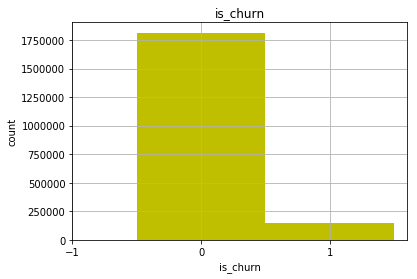

In [221]:
df_train.hist(column="is_churn",bins = range(0,3), align='left',color = 'y')
xticks(range(-1,2))
ax = pyplot.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
pyplot.xlabel('is_churn')  
pyplot.ylabel('count')  

Class Imbalance and Undersampling

In [222]:
#Taking random samples to avoid undersampling
random_sample_size = sum(y_train == 1)
churn0_index = y_train[y_train == 0].index
random_indices = np.random.choice(churn0_index, random_sample_size*5)
random_indices = list(random_indices)
churn0_data = X_train.ix[random_indices]
churn1_data = X_train.ix[y_train[y_train == 1].index]
y0_data = y_train.ix[random_indices]
y1_data = y_train[y_train == 1]
X_final = pd.concat([churn0_data, churn1_data])
y_final = pd.concat([y0_data,y1_data])

C:\Users\ajayc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\ajayc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [223]:
len(churn0_index)

1269315

### Parameter Selection

#### We apply grid search to filter out best parameters for the prediction

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9],
               
             }

In [225]:
rdf_clf = RandomForestClassifier()

K fold cross validation with k = 10 

In [226]:
grid_clf = GridSearchCV(rdf_clf, param_grid, cv=10)
grid_clf.fit(X_final[columns], y_final)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [227]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [228]:
grid_clf.best_estimator_.feature_importances_

array([0.06284976, 0.13626503, 0.20959848, 0.15664163, 0.11098222,
       0.01417382, 0.08537571, 0.19258229, 0.00506632, 0.00545431,
       0.00326246, 0.01188232, 0.00586564])

In [229]:
feat_names = X_final.columns.values

#### Plotting the feature importance based on the score generated from estimator

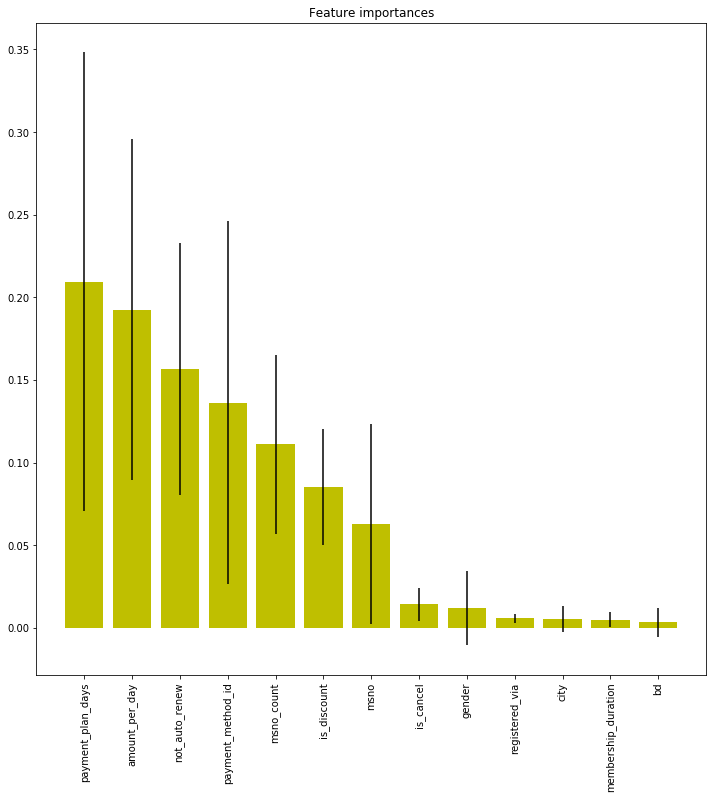

In [230]:
importanceOfFeature = grid_clf.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_clf.best_estimator_], axis=0)
indices = np.argsort(importanceOfFeature)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importanceOfFeature[indices], color="y", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

##### Now as we have the feature importance we will put these features into a RandoForestClassifier model

In [177]:
rdf_clf = RandomForestClassifier(n_estimators = 20,criterion = 'gini', max_features='log2')

In [178]:
rdf_clf.fit(X_final[columns], y_final)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Using the trained model to do prediction on test values

In [182]:
test_prediction = rdf_clf.predict(X_test[columns])

In [183]:
probability = rdf_clf.predict_proba(X_test[columns])

In [184]:
print(classification_report(y_test,test_prediction))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96    543775
          1       0.53      0.71      0.60     45393

avg / total       0.94      0.93      0.93    589168



#### Now we would plot the performance of our prediction using ROC, by plotting FPR(False Positive Rate) VS TPR(True Positive Rate)

In [186]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probability [:,1])

In [187]:
roc_auc = metrics.auc(fpr, tpr)

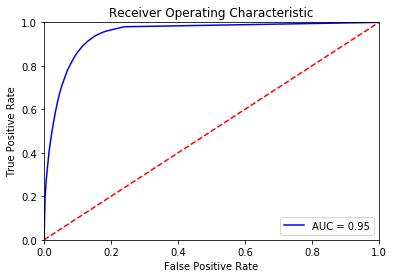

In [188]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### The more the curve aligns with the top leftmost corner axis better will be our prediction